<a href="https://colab.research.google.com/github/imprincesarraf/face-detection-face-recognition-and-emotion-detection/blob/main/speech_emotion_detection.1f_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Modules**



In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [31]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (6)'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        print(filename)
        break

YAF_boat_neutral.wav
OAF_bean_sad.wav
YAF_hit_sad.wav
YAF_book_happy.wav
OAF_boat_ps.wav
YAF_book_ps.wav
YAF_ditch_fear.wav
YAF_jug_disgust.wav
YAF_bath_angry.wav
OAF_dab_fear.wav
OAF_death_neutral.wav
OAF_death_angry.wav
OAF_gin_happy.wav
OAF_bar_disgust.wav


In [32]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (6)'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        #split on the based on "_" and get the last path
        label = filename.split('_')[-1]
        print(label)
        break


neutral.wav
sad.wav
sad.wav
happy.wav
ps.wav
ps.wav
fear.wav
disgust.wav
angry.wav
fear.wav
neutral.wav
angry.wav
happy.wav
disgust.wav


In [39]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (6)'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        #split on the based on "_" and get the last path
        label = filename.split('_')[-1]
        #again split to get the emotion alone
        label = label.split('.')[0]
        labels.append(label.lower())
        print(label)
        break


neutral
sad
sad
happy
ps
ps
fear
disgust
angry
fear
neutral
angry
happy
disgust


In [40]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (6)'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [41]:
len(paths)

2800

In [42]:
labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'neutral']

In [43]:
paths[:5]

['/content/drive/MyDrive/archive (6)/TESS Toronto emotional speech set data/YAF_neutral/YAF_boat_neutral.wav',
 '/content/drive/MyDrive/archive (6)/TESS Toronto emotional speech set data/YAF_neutral/YAF_bath_neutral.wav',
 '/content/drive/MyDrive/archive (6)/TESS Toronto emotional speech set data/YAF_neutral/YAF_chalk_neutral.wav',
 '/content/drive/MyDrive/archive (6)/TESS Toronto emotional speech set data/YAF_neutral/YAF_hall_neutral.wav',
 '/content/drive/MyDrive/archive (6)/TESS Toronto emotional speech set data/YAF_neutral/YAF_home_neutral.wav']

In [44]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


,speech,label
0,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
1,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
2,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
3,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
4,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral


In [45]:
df['label'].value_counts()

neutral    400
sad        400
happy      400
ps         400
fear       400
disgust    400
angry      400
Name: label, dtype: int64

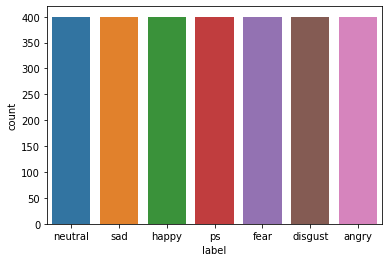

In [46]:
 sns.countplot(df['label'])


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  2800 non-null   object
 1   label   2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


In [48]:
df['label'].value_counts()

neutral    400
sad        400
happy      400
ps         400
fear       400
disgust    400
angry      400
Name: label, dtype: int64

In [49]:
print(df.columns.tolist())

['speech', 'label']


In [19]:
#X=df[df.label != 'ps']
#X.shape


In [50]:
X=df

In [51]:
X

,speech,label
0,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
1,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
2,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
3,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
4,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
...,...,...
2795,/content/drive/MyDrive/archive (6)/TESS Toront...,disgust
2796,/content/drive/MyDrive/archive (6)/TESS Toront...,disgust
2797,/content/drive/MyDrive/archive (6)/TESS Toront...,disgust
2798,/content/drive/MyDrive/archive (6)/TESS Toront...,disgust


In [52]:
import imblearn
from collections import Counter


In [53]:
#X=df.drop(["label"],axis=1)
y=df["label"]

In [54]:
X

,speech,label
0,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
1,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
2,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
3,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
4,/content/drive/MyDrive/archive (6)/TESS Toront...,neutral
...,...,...
2795,/content/drive/MyDrive/archive (6)/TESS Toront...,disgust
2796,/content/drive/MyDrive/archive (6)/TESS Toront...,disgust
2797,/content/drive/MyDrive/archive (6)/TESS Toront...,disgust
2798,/content/drive/MyDrive/archive (6)/TESS Toront...,disgust


In [55]:
y

0       neutral
1       neutral
2       neutral
3       neutral
4       neutral
         ...   
2795    disgust
2796    disgust
2797    disgust
2798    disgust
2799    disgust
Name: label, Length: 2800, dtype: object

In [57]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

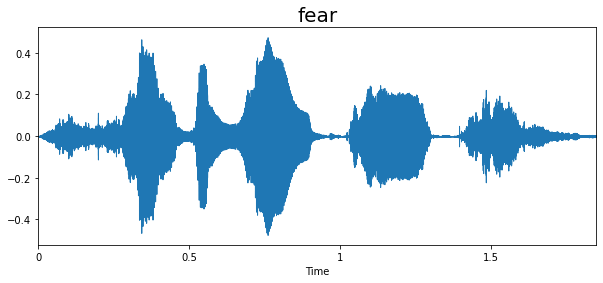

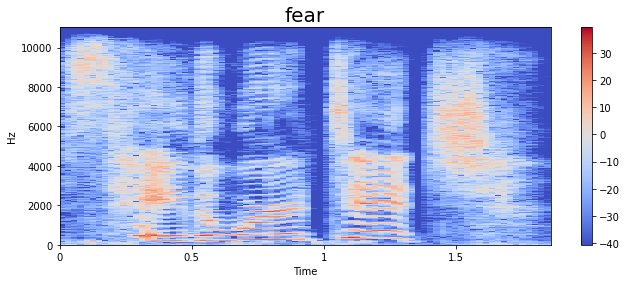

In [58]:
emotion = 'fear'
path = np.array(X['speech'][X['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

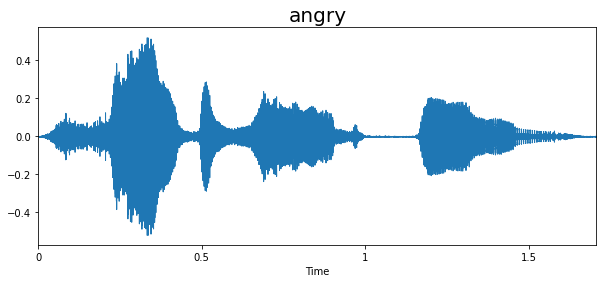

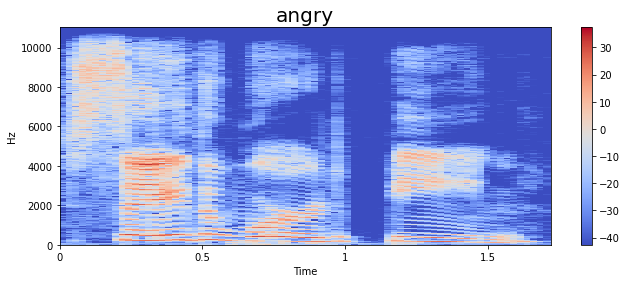

In [59]:
emotion = 'angry'
path = np.array(X['speech'][X['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

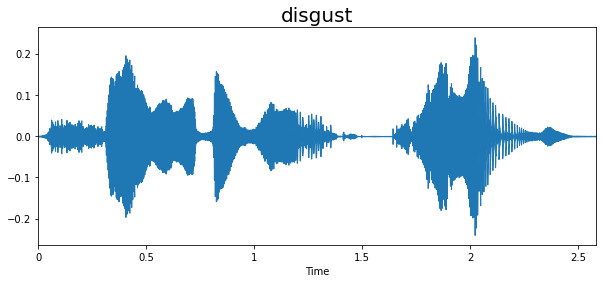

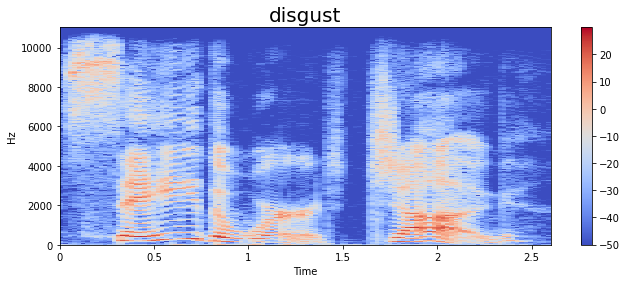

In [60]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

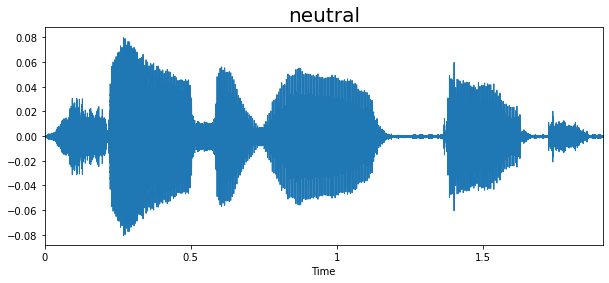

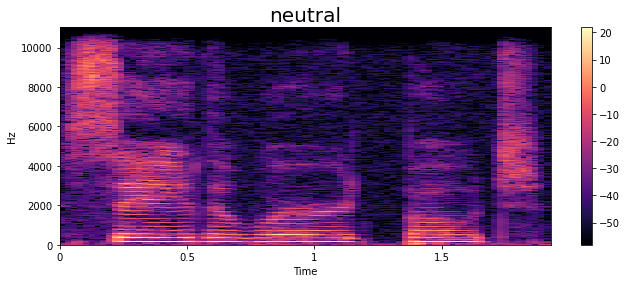

In [61]:
emotion = 'neutral'
path = np.array(X['speech'][X['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

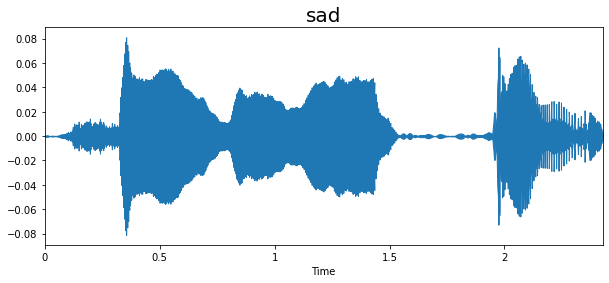

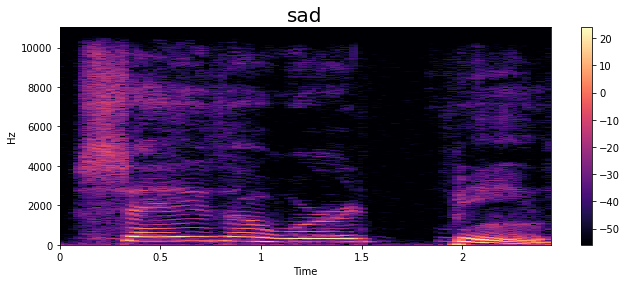

In [62]:
emotion = 'sad'
path = np.array(X['speech'][X['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

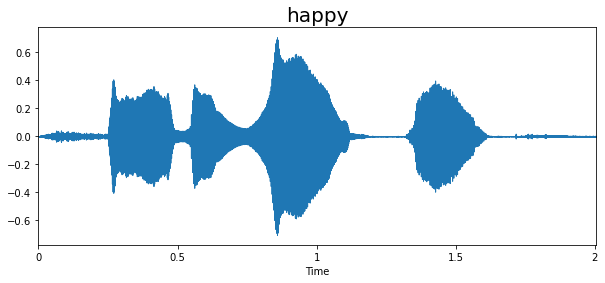

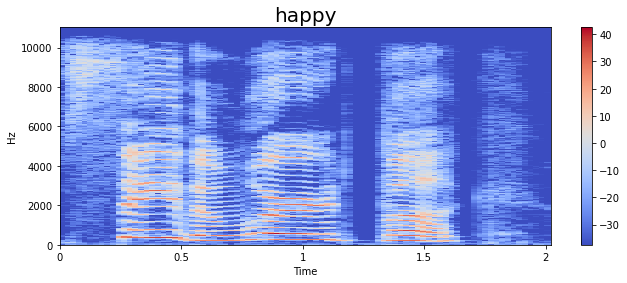

In [63]:
emotion = 'happy'
path = np.array(X['speech'][X['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**

In [64]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [65]:
extract_mfcc(X['speech'][0])

array([-4.9508380e+02,  1.0259111e+02,  1.7034893e+01,  2.5752863e+01,
       -4.8011905e-01,  1.1019127e+01, -4.8695235e+00, -1.0959411e+01,
       -7.8590903e+00,  8.2880983e+00, -6.6970305e+00,  8.6398058e+00,
       -4.6778622e+00,  1.1252199e+01, -6.7171550e+00, -1.9723488e-01,
       -2.2561548e+00,  2.7923298e+00, -8.9643145e+00, -1.8896863e-01,
       -9.1176224e-01, -2.6065404e+00, -7.8924522e+00,  3.4378943e+00,
       -7.0278606e+00, -7.6078123e-01, -4.0214806e+00, -3.0569947e-01,
       -4.4923935e+00, -5.5952865e-01, -1.0036816e+01,  2.0047083e+00,
       -6.1520839e+00,  6.6124415e+00,  8.8719854e+00,  2.0165285e+01,
        1.9773174e+01,  1.8713736e+01,  6.8816566e+00,  4.5973454e+00],
      dtype=float32)

In [67]:
#Mel-Frequency Cepstral Coefficients
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-209.9055, 33.138386, -29.011623, 11.713843, ...
1       [-335.29007, 36.445763, -14.592221, 15.612029,...
2       [-321.08243, 30.770988, -10.949012, 31.180319,...
3       [-339.4985, 60.387104, -29.574814, 20.3983, 0....
4       [-327.47778, 26.309711, -18.654455, 40.59416, ...
                              ...                        
2795    [-426.17163, 97.81175, 18.093454, -3.8631647, ...
2796    [-437.52792, 134.83585, 19.242134, -9.124584, ...
2797    [-446.33246, 114.295586, 24.431284, -14.48222,...
2798    [-416.59723, 105.31563, 3.9727983, -15.806644,...
2799    [-428.86118, 89.665436, 26.386932, 6.8678303, ...
Name: speech, Length: 2800, dtype: object

In [68]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [69]:
## input split
X = np.expand_dims(X, -1)
X.shape


(2800, 40, 1)

In [70]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [71]:
y = y.toarray()

In [72]:
y.shape

(2800, 7)

In [ ]:
##Create the LSTM Model

In [135]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(40,1)),
    Dropout(.3),
    Dense(32, activation='relu'),
    Dropout(.6),
    Dense(16, activation='relu'),
    Dropout(0.2),
  
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_58 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dropout_59 (Dropout)        (None, 32)                0         
                                                                 
 dense_59 (Dense)            (None, 16)                528       
                                                                 
 dropout_60 (Dropout)        (None, 16)                0         
                                                                 
 dense_60 (Dense)            (None, 7)               

In [136]:
# Train the model
history = model.fit(X, y, validation_split=0.05, epochs=100, batch_size=64)

Epoch 1/100
42/42 [==============================] - 3s 21ms/step - loss: 1.9481 - accuracy: 0.1639 - val_loss: 2.0018 - val_accuracy: 0.0000e+00
Epoch 2/100
42/42 [==============================] - 0s 7ms/step - loss: 1.9092 - accuracy: 0.1895 - val_loss: 2.0209 - val_accuracy: 0.0000e+00
Epoch 3/100
42/42 [==============================] - 0s 7ms/step - loss: 1.8845 - accuracy: 0.2222 - val_loss: 2.0100 - val_accuracy: 0.0000e+00
Epoch 4/100
42/42 [==============================] - 0s 7ms/step - loss: 1.8535 - accuracy: 0.2496 - val_loss: 1.9791 - val_accuracy: 0.0143
Epoch 5/100
42/42 [==============================] - 0s 7ms/step - loss: 1.8202 - accuracy: 0.2680 - val_loss: 1.8955 - val_accuracy: 0.0571
Epoch 6/100
42/42 [==============================] - 0s 7ms/step - loss: 1.7852 - accuracy: 0.2914 - val_loss: 1.8634 - val_accuracy: 0.0143
Epoch 7/100
42/42 [==============================] - 0s 6ms/step - loss: 1.7562 - accuracy: 0.3109 - val_loss: 1.8797 - val_accuracy: 0.0000e

**REFERENCES**
-https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0
-https://www.youtube.com/watch?v=JisESsmQDS8